# This is lab1 Jakub Majcher

Generate 1000 samples of uniform distribution on interval [0,1]

In [2]:
import numpy as np

uniform_samples = np.random.uniform(low=0.0, high=1.0, size=1000)

Generate 1000 samples of normal distribution with mean = 0 and standard deviation = 1

In [3]:
import numpy as np

normal_samples1 = np.random.normal(loc=0.0, scale=1.0, size=1000)

Generate 1000 samples of normal distribution with mean = 0 and standard deviation = 10

In [4]:
import numpy as np

normal_samples2 = np.random.normal(loc=0.0, scale=10.0, size=1000)

Generat 1000 samples of beta distribution for the following pairs of parameters (1,1), (2,2), (3,9)

In [5]:
import numpy as np

samples_b11 = np.random.beta(a=1, b=1, size=1000)
samples_b22 = np.random.beta(a=2, b=2, size=1000)
samples_b39 = np.random.beta(a=3, b=9, size=1000)

Generate 10000 samples of two-dimensional normal distributions each with mean and covariance matrices 

In [13]:
import numpy as np

mean = [0, 0]
cov1 = [[1, 0], [0, 1]]
cov2 = [[2, 1], [1, 2]]

x1_2d, y1_2d = np.random.multivariate_normal(mean=mean, cov=cov1, size=10000).T
x2_2d, y2_2d = np.random.multivariate_normal(mean=mean, cov=cov2, size=10000).T

For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).

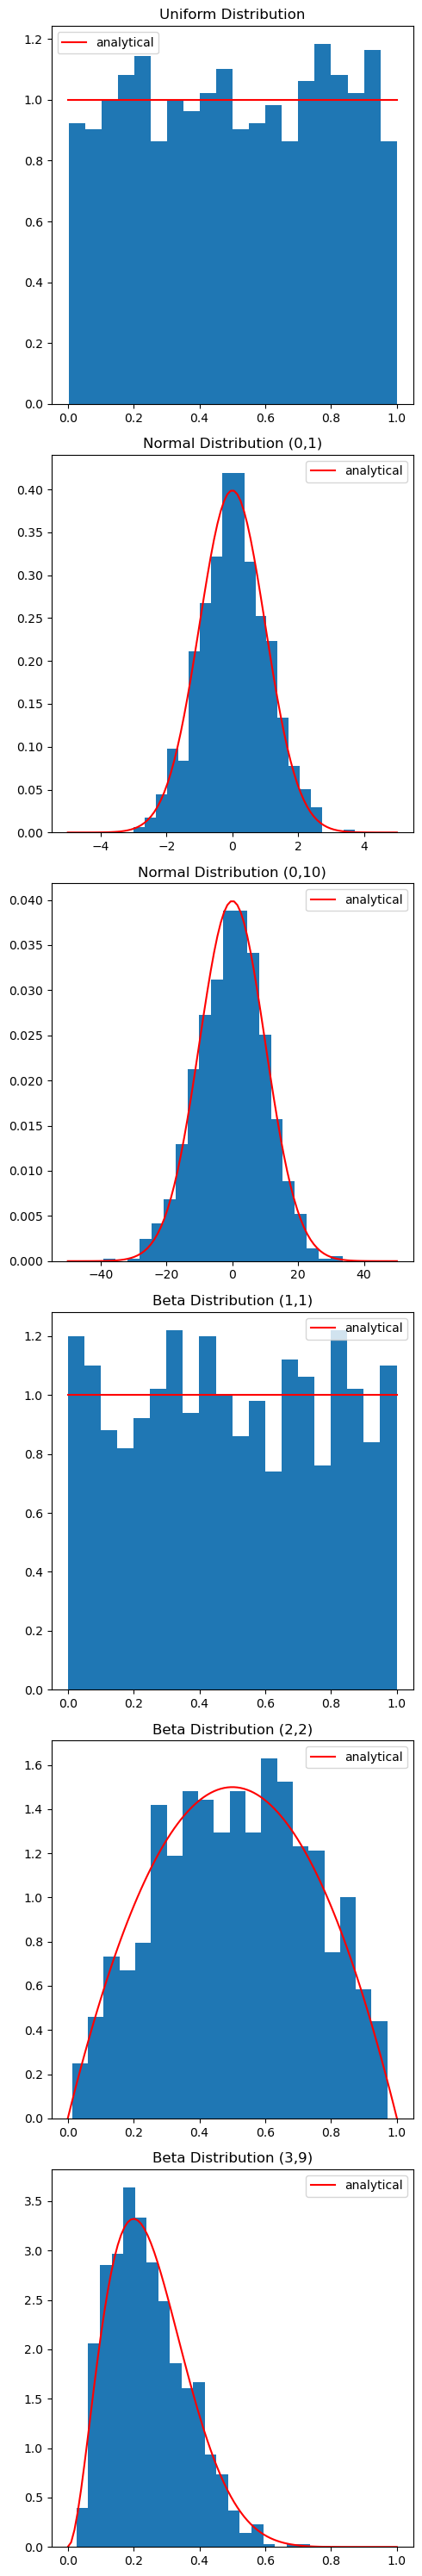

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta

# Plot histograms of the samples
fig, ax = plt.subplots(6, 1, figsize=(5, 30))

# Uniform samples
ax[0].hist(uniform_samples, bins=20, density=True)
ax[0].set_title("Uniform Distribution")

# Normal samples
ax[1].hist(normal_samples1, bins=20, density=True)
ax[1].set_title("Normal Distribution (0,1)")
ax[2].hist(normal_samples2, bins=20, density=True)
ax[2].set_title("Normal Distribution (0,10)")

# Beta samples
ax[3].hist(samples_b11, bins=20, density=True)
ax[3].set_title("Beta Distribution (1,1)")
ax[4].hist(samples_b22, bins=20, density=True)
ax[4].set_title("Beta Distribution (2,2)")
ax[5].hist(samples_b39, bins=20, density=True)
ax[5].set_title("Beta Distribution (3,9)")

# Analytical distributions for comparison
x_uniform = np.linspace(0, 1, 100)
x_normal1 = np.linspace(-5, 5, 100)
x_normal2 = np.linspace(-50, 50, 100)
x_beta = np.linspace(0, 1, 100)

y_uniform = np.ones_like(x_uniform)
y_normal1 = norm.pdf(x_normal1, loc=0, scale=1)
y_normal2 = norm.pdf(x_normal2, loc=0, scale=10)
y_beta11 = beta.pdf(x_beta, a=1, b=1)
y_beta22 = beta.pdf(x_beta, a=2, b=2)
y_beta39 = beta.pdf(x_beta, a=3, b=9)


ax[0].plot(x_uniform, y_uniform, 'r-', label='analytical')
ax[1].plot(x_normal1, y_normal1, 'r-', label='analytical')
ax[2].plot(x_normal2, y_normal2, 'r-', label='analytical')
ax[3].plot(x_beta, y_beta11, 'r-', label='analytical')
ax[4].plot(x_beta, y_beta22, 'r-', label='analytical')
ax[5].plot(x_beta, y_beta39, 'r-', label='analytical')

# legend and adjust layout
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
fig.tight_layout()

plt.show()

For two-dimensional distributions use hist2d method from pyplot. Try to analyze influence of bins. Try different 2d histogram functions (ex. from seaborn).

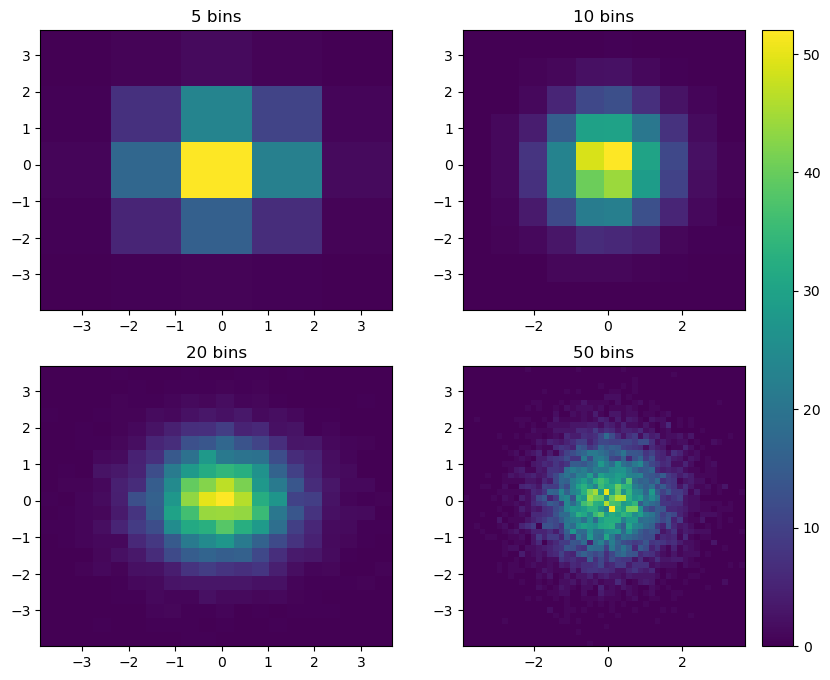

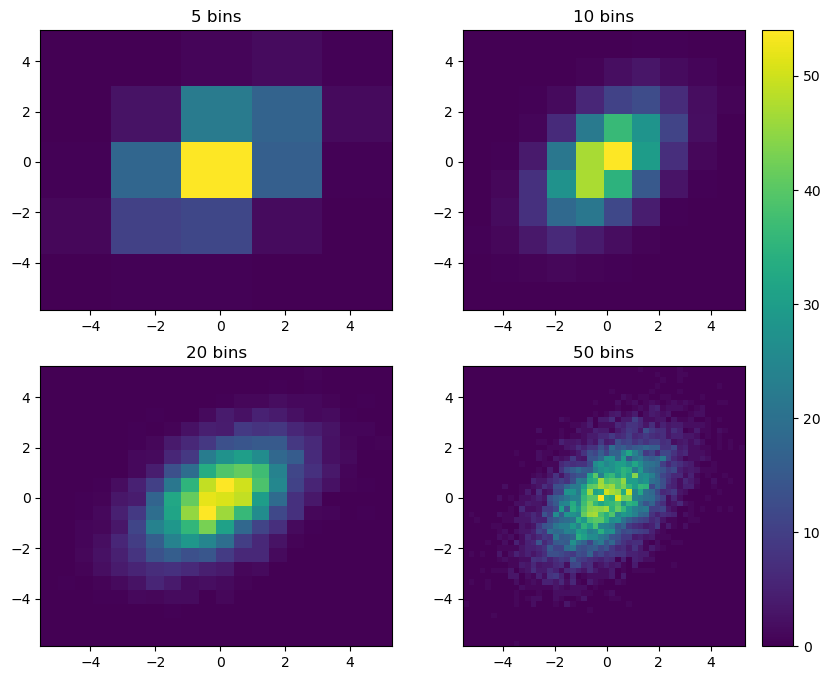

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def histogram2d(x, y):
    # Different bin sizes
    binsizes = [5, 10, 20, 50]
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Loop over different bin sizes and create histograms
    for i, binsize in enumerate(binsizes):
        row = i // 2
        col = i % 2
        ax = axs[row, col]
        ax.hist2d(x, y, bins=binsize)
        ax.set_title(f'{binsize} bins')

    # Add a colorbar to the last subplot
    fig.colorbar(axs[-1,-1].collections[0], ax=axs[:, -1])

    # Show the plot
    plt.show()

histogram2d(x1_2d,y1_2d)
histogram2d(x2_2d,y2_2d)

Generate 1000 y points from the following model ( First sample α, ß, x,  σ then compute algebraically, then sample a value of y . Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result). y ~ Normal(µ, σ), µ = α +ßx, α ~ Normal(2, 0.1), ß ~ Normal(2, 0.1), x ~ Normal(2, 0.1), σ ~ Normal(2, 0.1), 

In [3]:
import numpy as np

# Sample values of α, ß, x, and σ
alpha = np.random.normal(loc=2, scale=0.1, size=1000)
beta = np.random.normal(loc=2, scale=0.1, size=1000)
x = np.random.normal(loc=2, scale=0.1, size=1000)
sigma = np.abs(np.random.normal(loc=2, scale=0.1, size=1000))

# Mean of y for each iteration
y_mean = alpha + beta*x

# Sample y from normal distribution for each iteration
y = np.random.normal(loc=y_mean, scale=sigma)

In [14]:
print(y)

[ 7.78714104  7.50648959  6.45862045  4.26831871  1.91373403  9.29684039
  6.975974    4.38830902  2.38175251  5.83810436  8.55719299  6.35532575
  4.57726229  5.99316587  9.70162062  6.13825869  5.76696874  6.3721861
  7.22135658  8.11574793  3.11049999  5.81053602  6.77791785  4.09785512
  1.85776339  3.69394937  8.70643983  4.1568416   6.27621951  5.42697901
  5.37644873  6.70262571  6.31045128  6.12027817  6.74948488  6.80348018
  3.88674369  9.10028093  9.99326485  4.63554172  7.22275782  7.3119597
  1.7809621   3.43158485  8.14400167  5.4372767   4.75684351  6.71798735
  4.50315196  7.83556821  6.31732441  6.20265376  4.27286174  6.76880019
  4.03352277  7.85779151  8.20126399  7.98149599  6.73813456  4.04049554
  3.9011925   9.32978067  7.75434303  7.0299435   5.45711384  4.6090329
  5.80937671  7.22425992  5.76818627  4.15739475  7.33246927  8.38822541
  5.89824923  5.78098939  5.94215767  4.07920681  4.45088191  5.05182405
  4.25683874  6.24568396  8.8043907   7.52733331  6.41

Plot y values as a function of x. Compare them with lines of 
y = α + ßx, plotted for x between -6 and 6 for each of randomly sampled α and ß pair (on the same plot).

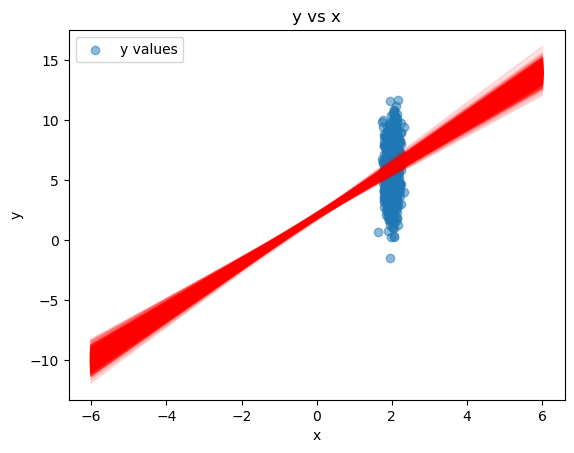

In [15]:
import matplotlib.pyplot as plt

# Set x range
x_range = np.linspace(-6, 6, num=1000)

# Plot y values as a function of x
plt.scatter(x, y, alpha=0.5, label='y values')

# Plot lines of y = alpha + beta*x for randomly sampled alpha and beta pairs
for i in range(1000):
    alpha_i = alpha[i]
    beta_i = beta[i]
    y_range = alpha_i + beta_i*x_range
    plt.plot(x_range, y_range, 'r-', alpha=0.1)

# Set plot title and labels
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')

# Add legend
plt.legend()

# Display plot
plt.show()
